# Load Packages

In [1]:
using DifferentialEquations
using OrdinaryDiffEq
using DiffEqBase
using Sundials
using ODEInterfaceDiffEq
using Plots
using Measures
using CSV
using DataFrames
# using Turing
# using MCMCChains
using EasyFit
using StatsPlots
using LinearAlgebra
using Random
using Distributions
using LsqFit
using BlackBoxOptim
using LaTeXStrings
using JLD2
using BlackBoxOptim: num_func_evals
using LatinHypercubeSampling

# Load Model Functions

In [2]:
include("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\ModelFunctionsAll.jl")

ObjectFunctMECp (generic function with 1 method)

# Load Data and Pyruvate T1s

In [3]:
global dat2 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\2Mil_Dat.csv", DataFrame));
global dat4 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\4Mil_Dat.csv", DataFrame));
global dat8 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\8Mil_Dat.csv", DataFrame));
global dat8NCO2 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\8Mil_NoCO2_Dat.csv", DataFrame));


global datT1 = Matrix(CSV.read("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\ProcessedData\\T1s.csv", DataFrame));

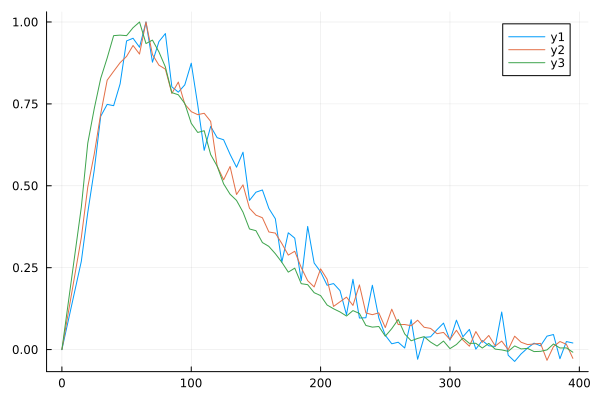

In [4]:
plot(dat2[:,1], dat2[:,4]./maximum(dat2[:,4]))
plot!(dat4[:,1], dat4[:,4]./maximum(dat4[:,4]))
plot!(dat8[:,1], dat8[:,4]./maximum(dat8[:,4]))

# Parameter Estimation

## No Transporter

In [5]:
ObjectFunctME([1,1,1,1])

3.0459948499097794e8

In [7]:
T1ss = vcat(datT1[1:5,2], datT1[7:11,2]);

In [8]:
(mean(T1ss)-std(T1ss)*4, mean(T1ss)+std(T1ss)*4)

(30.119483789108234, 62.972837309850206)

In [7]:
Iters = 40;
CCs = Array{Any}(undef,Iters);
Fits = Array{Any}(undef,Iters);

In [129]:
Random.seed!(789521354)
plan = randomLHC(Iters,4)
initguess = scaleLHC(plan,[(0, 1e-2), (0, 1e-2), (25, 100), (mean(T1ss)-std(T1ss)*4, mean(T1ss)+std(T1ss)*4)])

40×4 Matrix{Float64}:
 0.00589744   0.00615385    94.2308  47.8098
 0.00820513   0.00666667    30.7692  60.4457
 0.00897436   0.00820513    46.1538  51.1793
 0.00769231   0.00102564    44.2308  48.6521
 0.00512821   0.00717949    42.3077  44.4402
 0.00615385   0.00871795    59.6154  36.0162
 0.000769231  0.00435897    63.4615  45.2826
 0.00435897   0.00384615    84.6154  62.9728
 0.0025641    0.00307692    90.3846  40.2282
 0.00179487   0.01          51.9231  57.9185
 ⋮                                   
 0.00871795   0.00487179    69.2308  36.8586
 0.00153846   0.00846154    57.6923  41.913
 0.00102564   0.000512821   82.6923  46.9674
 0.00230769   0.00205128    88.4615  42.7554
 0.00974359   0.00769231    86.5385  62.1304
 0.00717949   0.00461538    32.6923  52.8641
 0.00487179   0.00282051    34.6154  50.3369
 0.00025641   0.0           71.1538  37.701
 0.01         0.00923077   100.0     38.5434

In [10]:
Threads.nthreads()

20

In [ ]:
# Threads.@threads for i in 1:Iters
#     fitness_progress_history = Array{Tuple{Int, Float64},1}()
#     callback = oc -> push!(fitness_progress_history, (num_func_evals(oc), best_fitness(oc)))

#     resM = bboptimize(ObjectFunctME, initguess[i,:]; SearchRange = [(0, 1e-2), (0, 1e-2), (25, 100), (mean(T1ss)-std(T1ss)*4, mean(T1ss)+std(T1ss)*4)], 
#             MaxTime = 60*2, method = :adaptive_de_rand_1_bin, 
#             CallbackFunction = callback, CallbackInterval = 0.0)

#     CCs[i] = fitness_progress_history;
#     Fits[i] = resM;
# end

In [13]:
# # Plot convergence curve
# pl=plot(CCs[1], xaxis=:log, linetype=:step, label = "", xlabel = "Iteration", ylabel = "CCV")
# for i in 2:length(CCs)
#     plot!(CCs[i], xaxis=:log, linetype=:step, label = "")
# end

# display(pl)

In [14]:
# parfit = zeros(4, Iters);
# for i in 1:Iters
#     parfit[:,i] = best_candidate(Fits[i]);
# end

In [15]:
# pp = mean(parfit, dims = 2)

In [ ]:
# JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resM.jld2", "Fits",Fits)
# JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVect.jld2", 
#         "resMMat",parfit, "CCs", CCs, "initguess", initguess)

In [130]:
pp = mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVect.jld2")["resMMat"], dims = 2);


In [131]:
hcat(mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVect.jld2")["resMMat"], dims = 2),
     std(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVect.jld2")["resMMat"], dims = 2))

4×2 Matrix{Float64}:
  0.000168398  2.05651e-6
  2.23228e-6   3.20859e-6
 55.3046       0.530675
 50.0912       0.119033

#### Plot Results

In [132]:
tsC2 = dat2[:,1]
ts = 0:tsC2[end];
ivss = [dat2[1,2], dat2[1,4]];
samps = convert.(Int, tsC2);
SimOnTime1, SimOffTime1, SimAll1  = PyruvateHP_NMR_SolveAll(ts, vcat(vcat(pp[1:2].*2, pp[3:end]), 0), ivss, samps);


tsC4 = dat4[:,1]
ts = 0:tsC4[end];
ivss = [dat4[1,2], dat4[1,4]];
samps = convert.(Int, tsC4);
SimOnTime2, SimOffTime2, SimAll2  = PyruvateHP_NMR_SolveAll(ts, vcat(vcat(pp[1:2].*4, pp[3:end]), 0), ivss, samps);


tsC8 = dat8[:,1]
ts = 0:tsC8[end];
ivss = [dat8[1,2], dat8[1,4]];
samps = convert.(Int, tsC8);
SimOnTime3, SimOffTime3, SimAll3  = PyruvateHP_NMR_SolveAll(ts, vcat(vcat(pp[1:2].*8, pp[3:end]), 0), ivss, samps);

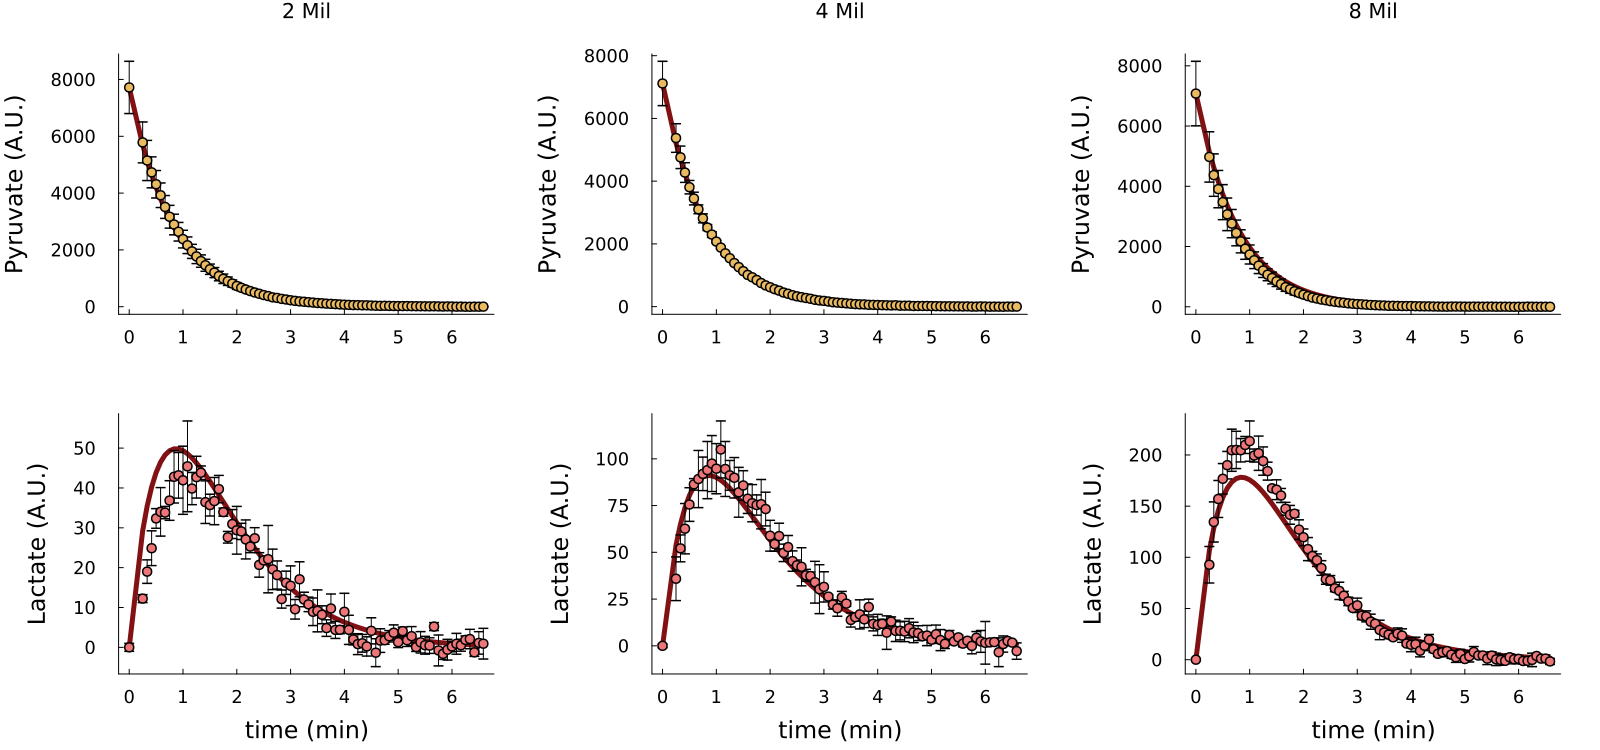

In [134]:
pp1 = plot(tsC2./60, SimOnTime1[:,1,1], linewidth = 5, color = "#821114ff", label = "", title = "2 Mil")
scatter!(tsC2./60, dat2[:,2], yerror = dat2[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsC2./60, SimOnTime1[:,2,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC2./60, dat2[:,4], yerror = dat2[:,5], label = "", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P1 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)

pp1 = plot(tsC4./60, SimOnTime2[:,1,1], linewidth = 5, color = "#821114ff", label = "", title = "4 Mil")
scatter!(tsC4./60, dat4[:,2], yerror = dat4[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsC4./60, SimOnTime2[:,2,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC4./60, dat4[:,4], yerror = dat4[:,5], label = "", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P2 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)


pp1 = plot(tsC8./60, SimOnTime3[:,1,1], linewidth = 5, color = "#821114ff", label = "", title = "8 Mil")
scatter!(tsC8./60, dat8[:,2], yerror = dat8[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsC8./60, SimOnTime3[:,2,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC8./60, dat8[:,4], yerror = dat8[:,5], label = "", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P3 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)

plot(P1,P2,P3, layout=(1,3), size = (1600,750))

In [135]:
nRMSE = ((sqrt(sum(((SimOnTime1[2:end,1,1]-dat2[2:end,2]).^2)./dat2[2:end,3].^2)/length(dat2[2:end,2])) + sqrt(sum(((SimOnTime1[2:end,2,1]-dat2[2:end,4]).^2)./dat2[2:end,5].^2)/length(dat2[2:end,4])))/2+
(sqrt(sum(((SimOnTime2[2:end,1,1]-dat4[2:end,2]).^2)./dat4[2:end,3].^2)/length(dat4[2:end,2])) + sqrt(sum(((SimOnTime2[2:end,2,1]-dat4[2:end,4]).^2)./dat4[2:end,5].^2)/length(dat4[2:end,4])))/2+
(sqrt(sum(((SimOnTime3[2:end,1,1]-dat8[2:end,2]).^2)./dat8[2:end,3].^2)/length(dat8[2:end,2])) + sqrt(sum(((SimOnTime3[2:end,2,1]-dat8[2:end,4]).^2)./dat8[2:end,5].^2)/length(dat8[2:end,4])))/2) + sqrt(2*4)

7.800777480989488

In [136]:
nRMSELac = (( sqrt(sum(((SimOnTime1[2:end,2,1]-dat2[2:end,4]).^2)./dat2[2:end,5].^2)/length(dat2[2:end,4])))+
( sqrt(sum(((SimOnTime2[2:end,2,1]-dat4[2:end,4]).^2)./dat4[2:end,5].^2)/length(dat4[2:end,4])))+
( sqrt(sum(((SimOnTime3[2:end,2,1]-dat8[2:end,4]).^2)./dat8[2:end,5].^2)/length(dat8[2:end,4])))) + sqrt(2*4)

8.456669022561746

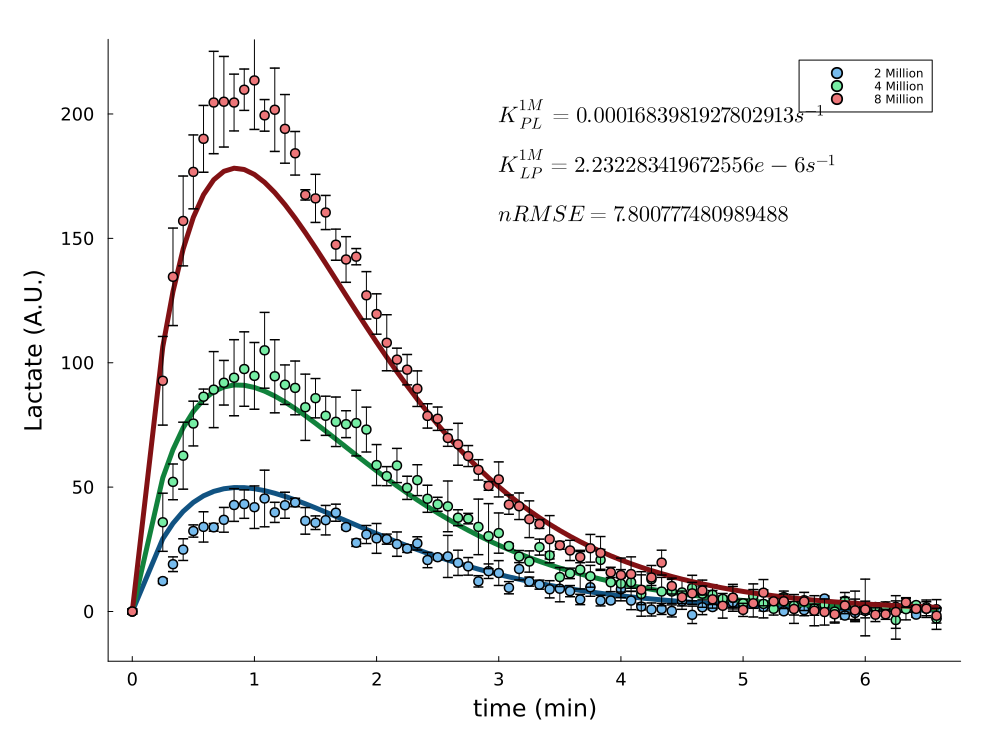

In [138]:
pp2 = plot(tsC2./60, SimOnTime1[:,2,1], linewidth = 5, color = "#115382ff", label = "")
scatter!(tsC2./60, dat2[:,4], yerror = dat2[:,5], label = "2 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#76bbedff", markersize=5)

plot!(tsC4./60, SimOnTime2[:,2,1], linewidth = 5, color = "#11823cff", label = "")
scatter!(tsC4./60, dat4[:,4], yerror = dat4[:,5], label = "4 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#76eda4ff", markersize=5)

plot!(tsC8./60, SimOnTime3[:,2,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC8./60, dat8[:,4], yerror = dat8[:,5], label = "8 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

annotate!(3, 200, text(latexstring("K_{PL}^{1M} =  "*string(pp[1])*" s^{-1}"), :black, :left, 15))
annotate!(3, 180, text(latexstring("K_{LP}^{1M} =  "*string(pp[2])*" s^{-1}"), :black, :left, 15))
annotate!(3, 160, text(latexstring("nRMSE =  "*string(nRMSE)*" "), :black, :left, 15))

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))

# savefig("NoTransporterFit.svg")

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))

(30.119483789108234, 62.972837309850206)

## Transporter

In [5]:
ObjectFunctMETR([1,1,1,1,1])

3.0459948499111056e8

In [9]:
T1ss = vcat(datT1[1:5,2], datT1[7:11,2]);

In [7]:
Iters = 1;
CCsT = Array{Any}(undef,Iters);
FitsT = Array{Any}(undef,Iters);

In [100]:
# Random.seed!(4879564)
# plan = randomLHC(Iters,5)
# initguessT = scaleLHC(plan,[(0, 1e-2), (0, 1e-2), (25, 100), (mean(T1ss)-std(T1ss)*4, mean(T1ss)+std(T1ss)*4), (0, 1e-1)])

In [74]:
# Threads.@threads for i in 1:Iters
#         fitness_progress_history = Array{Tuple{Int, Float64},1}()
#         callback = oc -> push!(fitness_progress_history, (num_func_evals(oc), best_fitness(oc)))

#         resM = bboptimize(ObjectFunctMETR, initguessT[i,:]; SearchRange = [(0, 1e-2), (0, 1e-2), (25, 100), (mean(T1ss)-std(T1ss)*4, mean(T1ss)+std(T1ss)*4), (0, 1e-1)], 
#                 MaxTime = 60*0.2, method = :adaptive_de_rand_1_bin, 
#                 CallbackFunction = callback, CallbackInterval = 0.0)

#         CCsT[i] = fitness_progress_history;
#         FitsT[i] = resM;
# end

In [105]:
# i=1
# fitness_progress_history = Array{Tuple{Int, Float64},1}()
# callback = oc -> push!(fitness_progress_history, (num_func_evals(oc), best_fitness(oc)))

# resM = bboptimize(ObjectFunctMETR; SearchRange = [(0, 1e-2), (0, 1e-2), (25, 100), (mean(T1ss)-std(T1ss)*4, mean(T1ss)+std(T1ss)*4), (0, 1e-1)], 
#         MaxTime = 60*4, method = :adaptive_de_rand_1_bin, 
#         CallbackFunction = callback, CallbackInterval = 0.0)

# CCsT[i] = fitness_progress_history;
# FitsT[i] = resM;

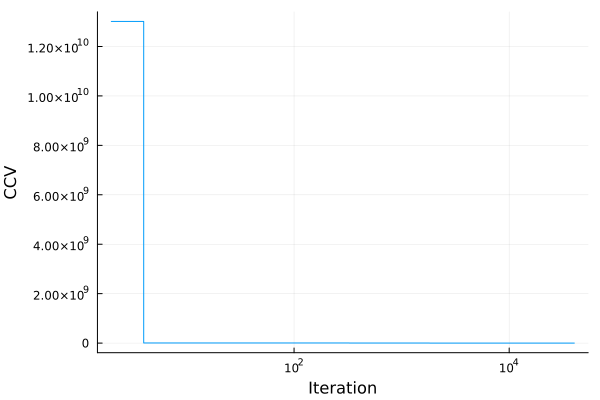

In [106]:
# # Plot convergence curve
# pl=plot(CCsT[1], xaxis=:log, linetype=:step, label = "", xlabel = "Iteration", ylabel = "CCV")
# for i in 2:length(CCsT)
#     plot!(CCsT[i], xaxis=:log, linetype=:step, label = "")
# end

# display(pl)

In [109]:
# parfitT = zeros(5, Iters);
# for i in 1:Iters
#     parfitT[:,i] = best_candidate(FitsT[i]);
# end

In [110]:
# ppT = mean(parfitT, dims = 2)

5×1 Matrix{Float64}:
  0.00999999999989405
  0.00789216686370161
 41.73351464475684
 51.20933014343426
  0.0004895619448586228

In [142]:
# JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMT.jld2", "FitsT",FitsT)
# JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectT.jld2", 
#         "resMMat",parfitT, "CCsT", CCsT, "initguessT", initguessT)

In [8]:
ppT = mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectT.jld2")["resMMat"], dims = 2);


In [9]:
hcat(mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectT.jld2")["resMMat"], dims = 2),
     std(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectT.jld2")["resMMat"], dims = 2))

5×2 Matrix{Float64}:
  0.01         NaN
  0.00789217   NaN
 41.7335       NaN
 51.2093       NaN
  0.000489562  NaN

#### Plot Results

In [10]:
tsC2 = dat2[:,1]
ts = 0:tsC2[end];
ivss = [dat2[1,2], 0, dat2[1,4]];
samps = convert.(Int, tsC2);
SimOnTime1, SimOffTime1, SimAll1  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppT[1:2].*2, ppT[3:end-1], ppT[end]*2), 0), ivss, samps);


tsC4 = dat4[:,1]
ts = 0:tsC4[end];
ivss = [dat4[1,2], 0, dat4[1,4]];
samps = convert.(Int, tsC4);
SimOnTime2, SimOffTime2, SimAll2  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppT[1:2].*4, ppT[3:end-1], ppT[end]*4), 0), ivss, samps);


tsC8 = dat8[:,1]
ts = 0:tsC8[end];
ivss = [dat8[1,2], 0, dat8[1,4]];
samps = convert.(Int, tsC8);
SimOnTime3, SimOffTime3, SimAll3  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppT[1:2].*8, ppT[3:end-1], ppT[end]*8), 0), ivss, samps);

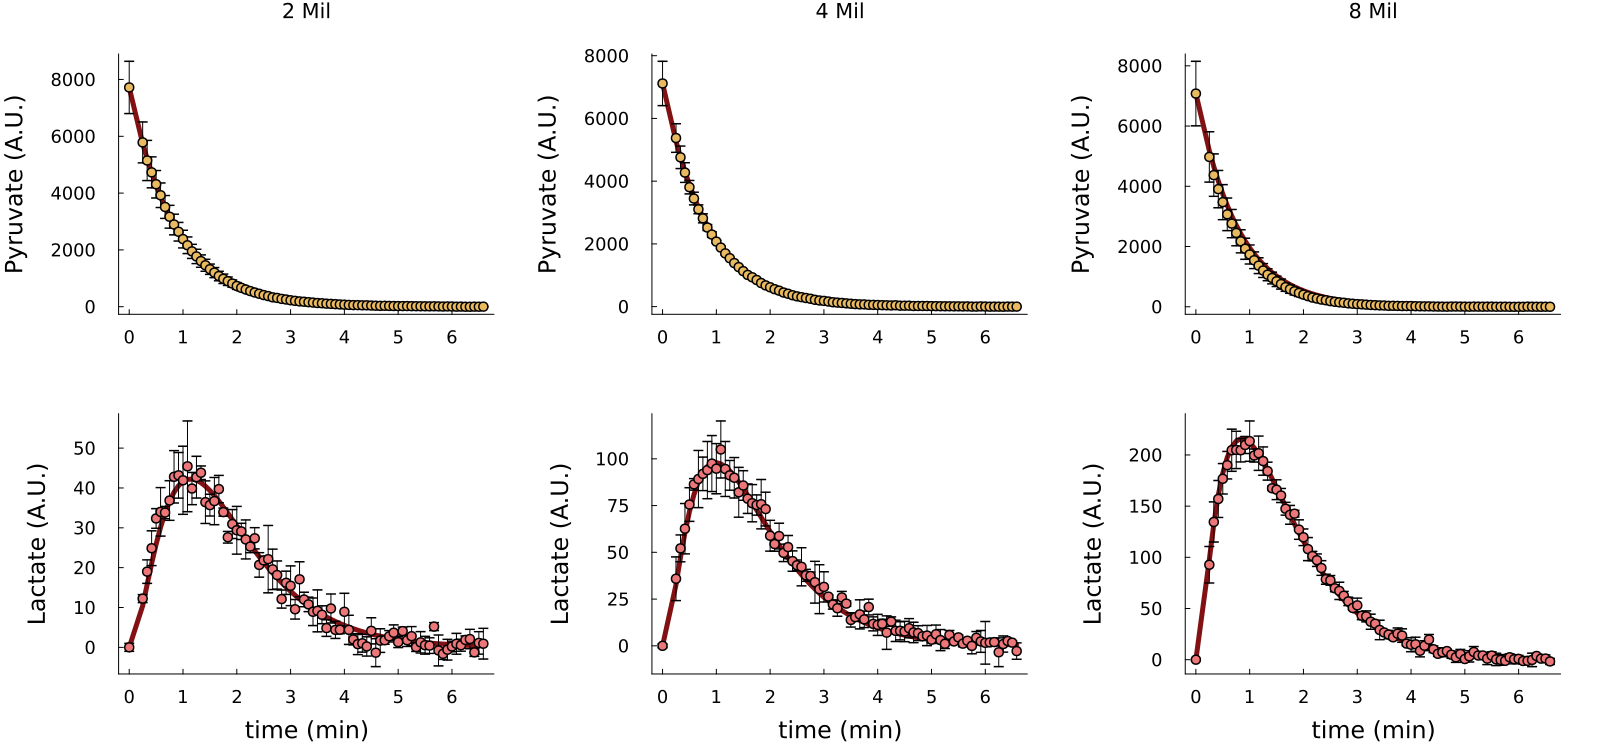

In [11]:
pp1 = plot(tsC2./60, SimOnTime1[:,1,1]+SimOnTime1[:,2,1], linewidth = 5, color = "#821114ff", label = "", title = "2 Mil")
scatter!(tsC2./60, dat2[:,2], yerror = dat2[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsC2./60, SimOnTime1[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC2./60, dat2[:,4], yerror = dat2[:,5], label = "", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P1 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)

pp1 = plot(tsC4./60, SimOnTime2[:,1,1]+SimOnTime2[:,2,1], linewidth = 5, color = "#821114ff", label = "", title = "4 Mil")
scatter!(tsC4./60, dat4[:,2], yerror = dat4[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsC4./60, SimOnTime2[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC4./60, dat4[:,4], yerror = dat4[:,5], label = "", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P2 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)


pp1 = plot(tsC8./60, SimOnTime3[:,1,1]+SimOnTime3[:,2,1], linewidth = 5, color = "#821114ff", label = "", title = "8 Mil")
scatter!(tsC8./60, dat8[:,2], yerror = dat8[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsC8./60, SimOnTime3[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC8./60, dat8[:,4], yerror = dat8[:,5], label = "", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P3 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)

pF = plot(P1,P2,P3, layout=(1,3), size = (1600,750))


savefig("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SVGsInit\\PosteriorTest.svg")


display(pF)

In [147]:
nRMSET = ((sqrt(sum((((SimOnTime1[2:end,1,1]+SimOnTime1[2:end,2,1])-dat2[2:end,2]).^2)./dat2[2:end,3].^2)/length(dat2[2:end,2])) + 
sqrt(sum(((SimOnTime1[2:end,3,1]-dat2[2:end,4]).^2)./dat2[2:end,5].^2)/length(dat2[2:end,4])))/2+

(sqrt(sum((((SimOnTime2[2:end,1,1]+SimOnTime2[2:end,2,1])-dat4[2:end,2]).^2)./dat4[2:end,3].^2)/length(dat4[2:end,2])) + 
sqrt(sum(((SimOnTime2[2:end,3,1]-dat4[2:end,4]).^2)./dat4[2:end,5].^2)/length(dat4[2:end,4])))/2+

(sqrt(sum((((SimOnTime3[2:end,1,1]+SimOnTime3[2:end,2,1])-dat8[2:end,2]).^2)./dat8[2:end,3].^2)/length(dat8[2:end,2])) + 
sqrt(sum(((SimOnTime3[2:end,3,1]-dat8[2:end,4]).^2)./dat8[2:end,5].^2)/length(dat8[2:end,4])))/2) + sqrt(2*5)

6.571743286503974

In [148]:
nRMSETLac = (( 
sqrt(sum(((SimOnTime1[2:end,3,1]-dat2[2:end,4]).^2)./dat2[2:end,5].^2)/length(dat2[2:end,4])))+

(
sqrt(sum(((SimOnTime2[2:end,3,1]-dat4[2:end,4]).^2)./dat4[2:end,5].^2)/length(dat4[2:end,4])))+

( 
sqrt(sum(((SimOnTime3[2:end,3,1]-dat8[2:end,4]).^2)./dat8[2:end,5].^2)/length(dat8[2:end,4])))/2) + sqrt(2*5)

5.726949478300391

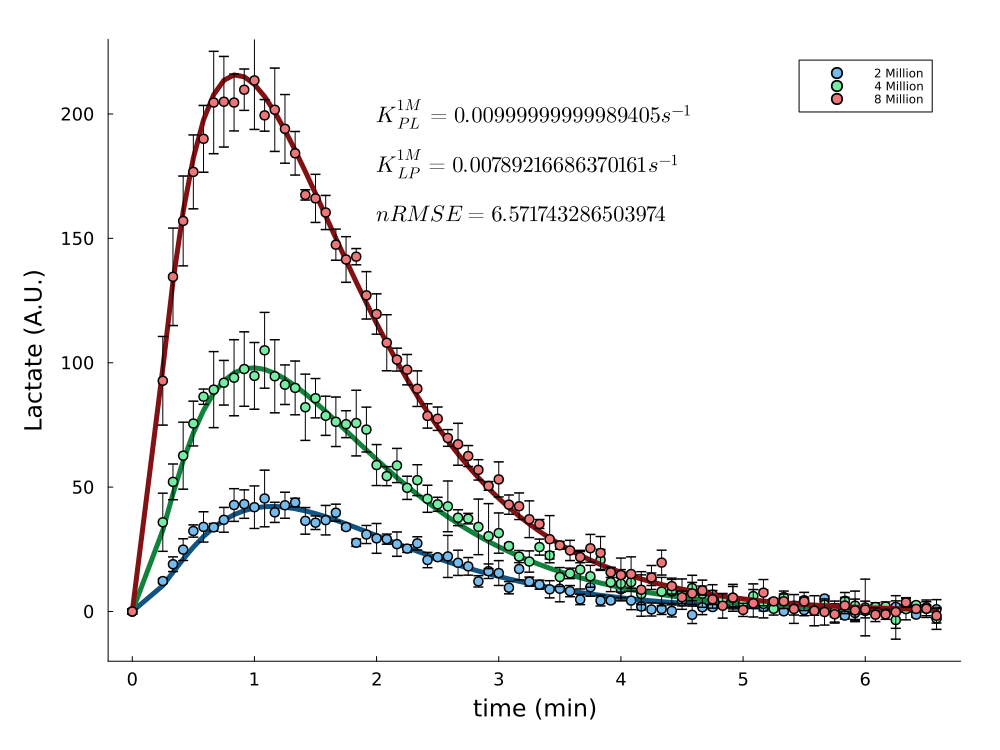

In [149]:
pp2 = plot(tsC2./60, SimOnTime1[:,3,1], linewidth = 5, color = "#115382ff", label = "")
scatter!(tsC2./60, dat2[:,4], yerror = dat2[:,5], label = "2 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#76bbedff", markersize=5)

plot!(tsC4./60, SimOnTime2[:,3,1], linewidth = 5, color = "#11823cff", label = "")
scatter!(tsC4./60, dat4[:,4], yerror = dat4[:,5], label = "4 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#76eda4ff", markersize=5)

plot!(tsC8./60, SimOnTime3[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC8./60, dat8[:,4], yerror = dat8[:,5], label = "8 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

annotate!(2, 200, text(latexstring("K_{PL}^{1M} =  "*string(ppT[1])*" s^{-1}"), :black, :left, 15))
annotate!(2, 180, text(latexstring("K_{LP}^{1M} =  "*string(ppT[2])*" s^{-1}"), :black, :left, 15))
annotate!(2, 160, text(latexstring("nRMSE =  "*string(nRMSET)*" "), :black, :left, 15))

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))

# savefig("NoTransporterFit.svg")

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))

#### Plot tests without transporter (kin=0)

In [119]:
tsC2 = dat2[:,1]
ts = 0:tsC2[end];
ivss = [dat2[1,2], 0, dat2[1,4]];
ivss2 = [dat2[1,2], dat2[1,4]];
samps = convert.(Int, tsC2);
SimOnTime1, SimOffTime1, SimAll1  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppT[1:2].*4, ppT[3:end-1], ppT[end]*4), 0), ivss, samps);
SimOnTime2, SimOffTime2, SimAll2  = PyruvateHP_NMR_SolveAll(ts, vcat(vcat(ppT[1:2].*4, ppT[3:end-1]), 0), ivss2, samps);

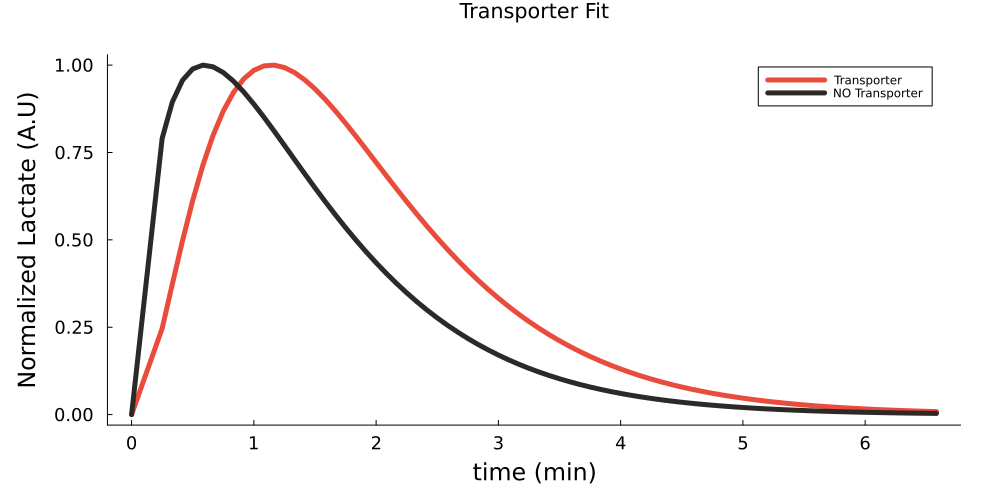

In [160]:
ps = plot(samps./60, SimOnTime1[:,3,1]./maximum(SimOnTime1[:,3,1]), label = "Transporter", size = (1000,500), linewidth=5, color = "#E94B3CFF",
    title = "Transporter Fit", xlabel = "time (min)", ylabel = "Normalized Lactate (A.U)", grid = false,
    margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)
plot!(samps./60, SimOnTime2[:,2,1]./maximum(SimOnTime2[:,2,1]), label = "NO Transporter", size = (1000,500), linewidth=5, color = "#2D2926FF")

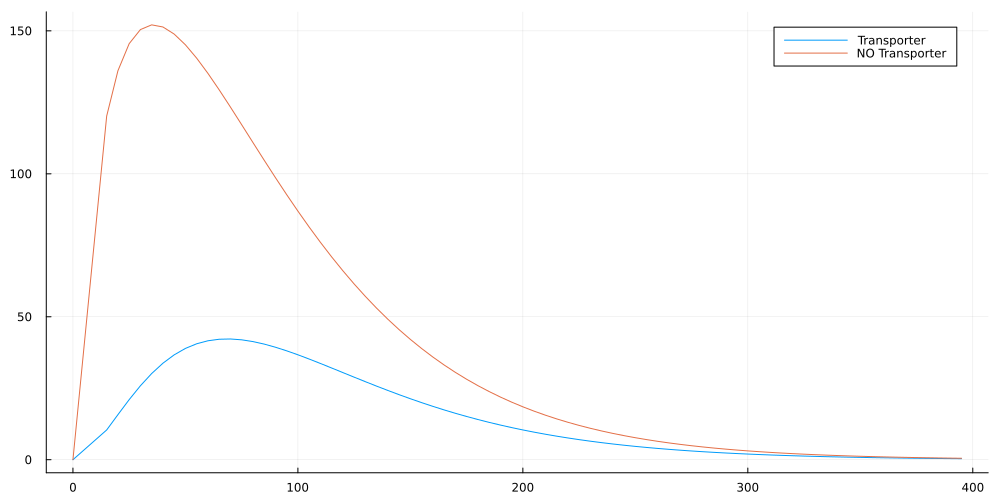

In [161]:
plot(samps, SimOnTime1[:,3,1], label = "Transporter", size = (1000,500))
plot!(samps, SimOnTime2[:,2,1], label = "NO Transporter", size = (1000,500))

In [162]:
tsC2 = dat2[:,1]
ts = 0:tsC2[end];
ivss = [dat2[1,2], 0, dat2[1,4]];
ivss2 = [dat2[1,2], dat2[1,4]];
samps = convert.(Int, tsC2);
SimOnTime1, SimOffTime1, SimAll1  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(pp[1:2].*4, pp[3:end], ppT[end]*4), 0), ivss, samps);
SimOnTime2, SimOffTime2, SimAll2  = PyruvateHP_NMR_SolveAll(ts, vcat(vcat(pp[1:2].*4, pp[3:end]), 0), ivss2, samps);

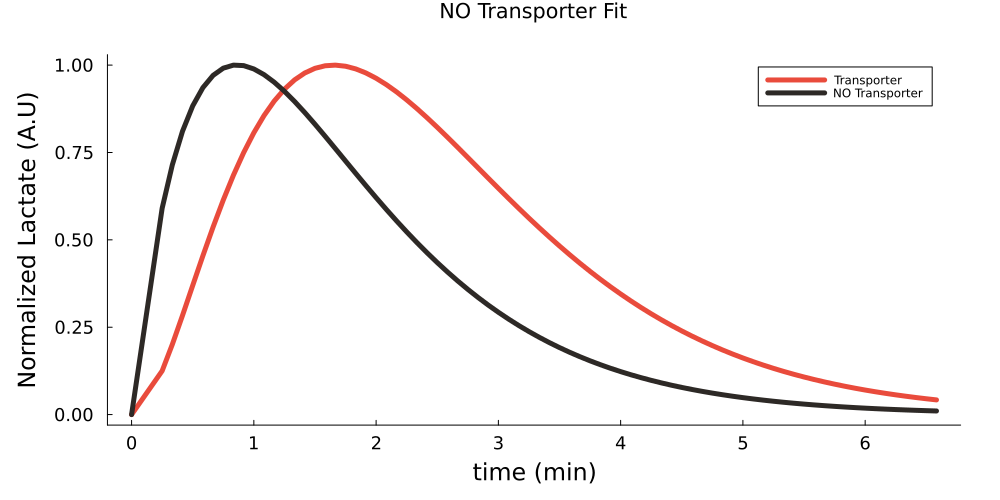

In [164]:
plot(samps./60, SimOnTime1[:,3,1]./maximum(SimOnTime1[:,3,1]), label = "Transporter", size = (1000,500), linewidth=5, color = "#E94B3CFF",
title = "NO Transporter Fit", xlabel = "time (min)", ylabel = "Normalized Lactate (A.U)", grid = false,
margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)
plot!(samps./60, SimOnTime2[:,2,1]./maximum(SimOnTime2[:,2,1]), label = "NO Transporter", size = (1000,500), linewidth=5, color = "#2D2926FF")

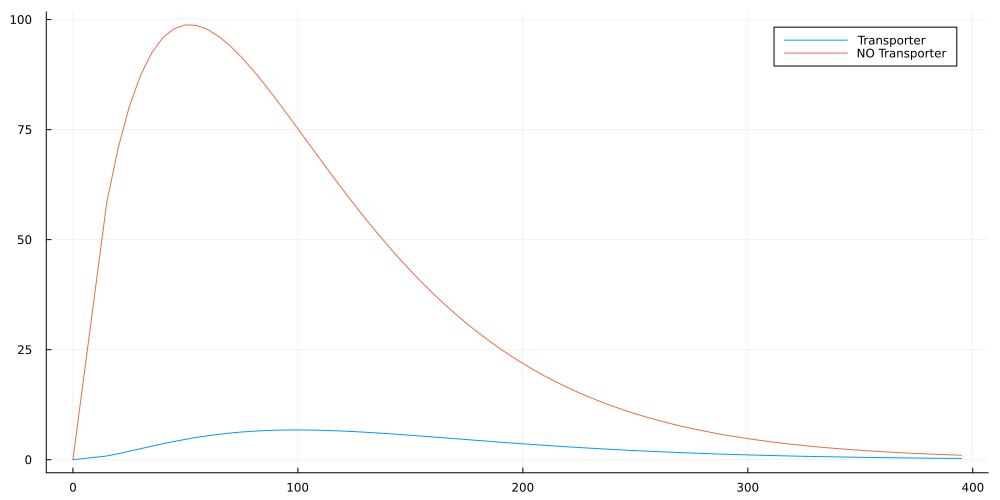

In [165]:
plot(samps, SimOnTime1[:,3,1], label = "Transporter", size = (1000,500))
plot!(samps, SimOnTime2[:,2,1], label = "NO Transporter", size = (1000,500))

## Transporter, No CO2

In [5]:
function ObjectFunctMETRC(p)

    # Define parameter vectors for each amount of cells (last parameter is a time delay, not used in here)
    pD3 = vcat(vcat(p[1:2].*8, p[3:end-1], p[end]*8), 0);


    # Define time vector
    t8cor = dat8NCO2[:,1];

    # Define equaly-spaced time vector
    ts3 = collect(0:t8cor[end]);

    # Define initial value for simulation (use of experimental mean)
    ivss3 = [dat8NCO2[1,2], 0, dat8NCO2[1,4]];

    # Convert sampling vector to integer to extract correct elements from simulation
    samps3 = convert.(Int, t8cor);

    # Simulate
    SimOnTime3, SimOffTime3, SimAll3  = PyruvateHP_NMR_SolveAllTb(ts3, pD3, ivss3, samps3);


    # Use of log-likelihood as cost funtion: J_llk = sum(-1/2 * (log(2*pi) + log(std^2) + (sim-dat)^2/std^2))
    mm13 = sum((-1/2) .* (log(2*pi) .+ log.(dat8NCO2[:,3].^2) .+ (((SimOnTime3[:,1]+SimOnTime3[:,2]) .- dat8NCO2[:,2]).^2)./(dat8NCO2[:,3].^2)));

    mm23 = sum((-1/2) .* (log(2*pi) .+ log.(dat8NCO2[:,5].^2) .+ ((SimOnTime3[:,3] .- dat8NCO2[:,4]).^2)./(dat8NCO2[:,5].^2)));


    # obj = (mm13*mm23);
    obj = (-mm23);
        
    return(obj)

end

ObjectFunctMETRC (generic function with 1 method)

In [6]:
ObjectFunctMETRC([1,1,1,1,1])

916.2793980786832

In [7]:
T1ss = vcat(datT1[1:5,2], datT1[7:11,2]);

In [8]:
Iters = 1;
CCsC = Array{Any}(undef,Iters);
FitsC = Array{Any}(undef,Iters);

In [ ]:
# Random.seed!(56789764)
# plan = randomLHC(Iters,5)
# initguessC = scaleLHC(plan,[(0, 1e-2), (0, 1e-5), (ppT[3], ppT[3]), (ppT[4], ppT[4]), (0, 1e-1)])

In [17]:
for i in 1:Iters
        fitness_progress_history = Array{Tuple{Int, Float64},1}()
        callback = oc -> push!(fitness_progress_history, (num_func_evals(oc), best_fitness(oc)))

        resM = bboptimize(ObjectFunctMETRC; SearchRange = [(0, 1e-2), (0, 1e-5), (ppT[3], ppT[3]), (ppT[4], ppT[4]), (0, 1e-1)], 
                MaxTime = 60*0.1, method = :adaptive_de_rand_1_bin, 
                CallbackFunction = callback, CallbackInterval = 0.0)

        CCsC[i] = fitness_progress_history;
        FitsC[i] = resM;
end

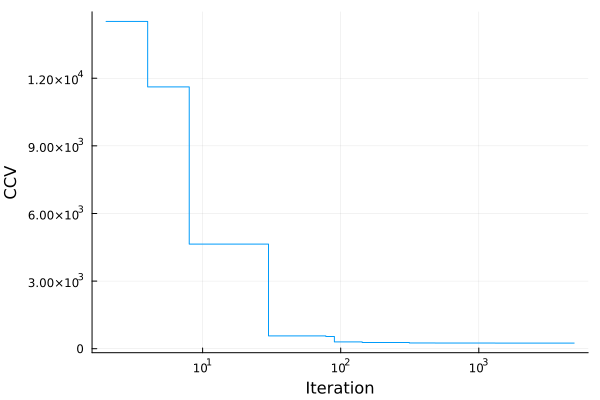

In [187]:
# Plot convergence curve
pl=plot(CCsC[1], xaxis=:log, linetype=:step, label = "", xlabel = "Iteration", ylabel = "CCV")
for i in 2:length(CCsC)
    plot!(CCsC[i], xaxis=:log, linetype=:step, label = "")
end

display(pl)

In [188]:
parfitC = zeros(5, Iters);
for i in 1:Iters
    parfitC[:,i] = best_candidate(FitsC[i]);
end

In [189]:
ppC = mean(parfitC, dims = 2)

5×1 Matrix{Float64}:
  0.0021676021001465428
  7.592036742125246e-6
 41.73351464475684
 51.20933014343426
  0.00031418604657513924

In [190]:
JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMC.jld2", "FitsC",FitsC)
JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC.jld2", 
        "resMMat",parfitC, "CCsC", CCsC)

In [9]:
ppC = mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC.jld2")["resMMat"], dims = 2);


In [192]:
hcat(mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC.jld2")["resMMat"], dims = 2),
     std(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC.jld2")["resMMat"], dims = 2))

5×2 Matrix{Float64}:
  0.0021676    NaN
  7.59204e-6   NaN
 41.7335       NaN
 51.2093       NaN
  0.000314186  NaN

#### Plot Results

In [10]:
tsCN = dat8NCO2[:,1]
ts = 0:tsCN[end];
ivss = [dat8NCO2[1,2], 0, dat8NCO2[1,4]];
samps = convert.(Int, tsCN);
SimOnTime1TN, SimOffTime1TN, SimAll1TN  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppC[1:2].*8, ppC[3:end-1], ppC[end].*8), 0), ivss, samps);

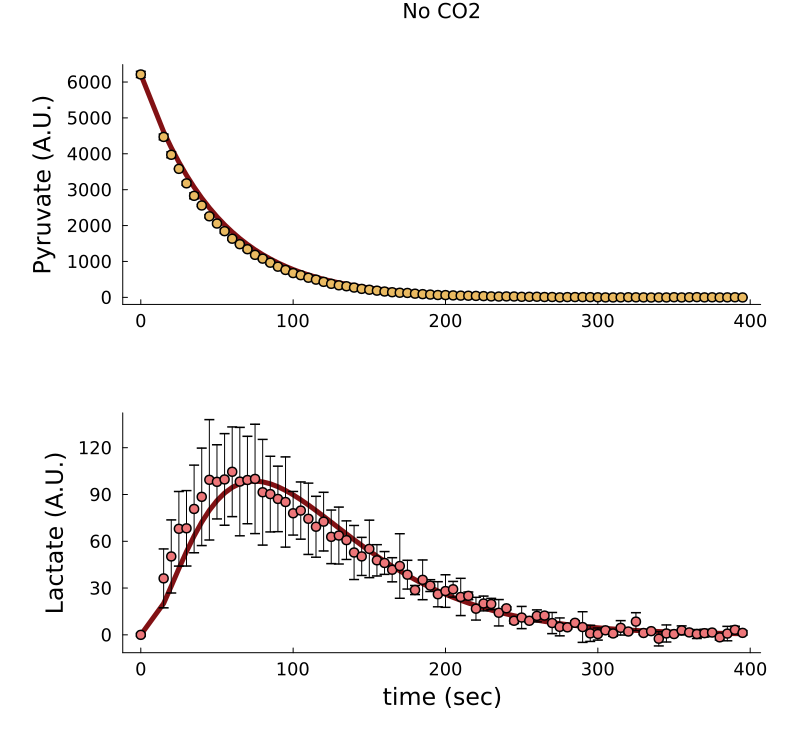

In [11]:
pp1 = plot(tsCN, SimOnTime1TN[:,1,1]+SimOnTime1TN[:,2,1], linewidth = 5, color = "#821114ff", label = "", title = "No CO2")
scatter!(tsCN, dat8NCO2[:,2], yerror = dat8NCO2[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsCN, SimOnTime1TN[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsCN, dat8NCO2[:,4], yerror = dat8NCO2[:,5], label = "", xlabel="time (sec)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P1 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)

In [12]:
pp2 = plot(tsCN, SimOnTime1TN[:,3,1], linewidth = 5, color = "#82117cff", label = "")
scatter!(tsCN, dat8NCO2[:,4], yerror = dat8NCO2[:,5], label = "8 Million, No CO2 ON", xlabel="time (sec)", ylabel = "Lactate (A.U.)", grid = false, color="#ed76e7ff", markersize=5)

plot!(tsC8, SimOnTime3[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsC8, dat8[:,4], yerror = dat8[:,5], label = "8 Million", xlabel="time (sec)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

annotate!(100, 200, text(latexstring("K_{PL}^{1M} =  "*string(ppT[1])*" s^{-1}  vs "*string(ppC[1])*" s^{-1}"), :black, :left, 15))
annotate!(100, 180, text(latexstring("K_{LP}^{1M} =  "*string(ppT[2])*" s^{-1}  vs "*string(ppC[2])*" s^{-1}"), :black, :left, 15))
annotate!(100, 160, text(latexstring("K_{IN}^{1M} =  "*string(ppT[5])*" s^{-1}  vs "*string(ppC[5])*" s^{-1}"), :black, :left, 15))

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))

# savefig("TransporterFitNoCO2.svg")

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))


UndefVarError: UndefVarError: `SimOnTime3` not defined

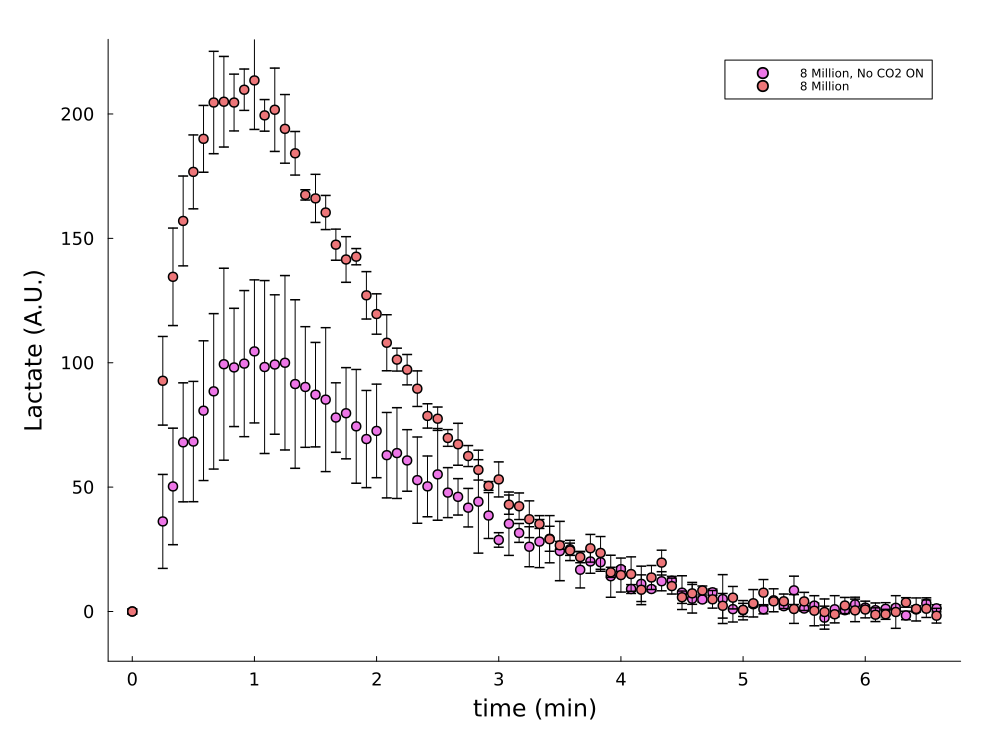

In [18]:
pp2 = scatter(tsCN./60, dat8NCO2[:,4], yerror = dat8NCO2[:,5], label = "8 Million, No CO2 ON", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#76edd3ff", markersize=5)

scatter!(tsCN./60, dat8[:,4], yerror = dat8[:,5], label = "8 Million", xlabel="time (min)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))

savefig("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\Paper\\Figures\\SVGsInit\\ComparHealthySick.svg")

plot(pp2, size = (1000,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12, ylim=(-20,230))


#### WE HAVE AN INCREASE IN TRANSPORT AND A DECREASE IN KINETICS. IF WE FIX ONE OF THE TWO PARAMETERS THE MODEL DOES NOT FIT, INDICATING THAT IT IS THE TWO

Same KPL and KLP as previous fit

In [196]:
T1ss = vcat(datT1[1:5,2], datT1[7:11,2]);

In [197]:
Iters = 1;
CCsC2 = Array{Any}(undef,Iters);
FitsC2 = Array{Any}(undef,Iters);

In [198]:
for i in 1:Iters
        fitness_progress_history = Array{Tuple{Int, Float64},1}()
        callback = oc -> push!(fitness_progress_history, (num_func_evals(oc), best_fitness(oc)))

        resM = bboptimize(ObjectFunctMETRC; SearchRange = [(ppT[1], ppT[1]), (ppT[2], ppT[2]), (ppT[3], ppT[3]), (ppT[4], ppT[4]), (0, 1e-1)], 
                MaxTime = 60*0.1, method = :adaptive_de_rand_1_bin, 
                CallbackFunction = callback, CallbackInterval = 0.0)

        CCsC2[i] = fitness_progress_history;
        FitsC2[i] = resM;
end

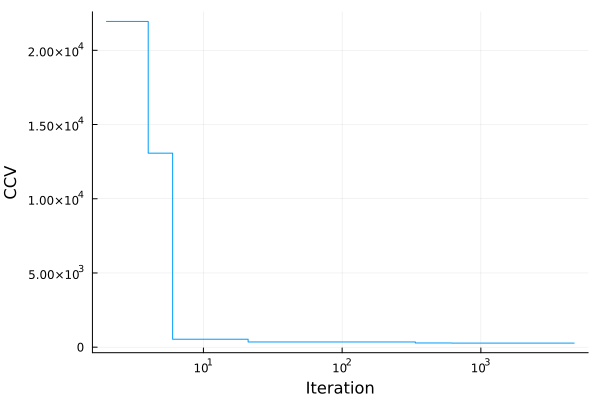

In [200]:
# Plot convergence curve
pl=plot(CCsC2[1], xaxis=:log, linetype=:step, label = "", xlabel = "Iteration", ylabel = "CCV")
for i in 2:length(CCsC2)
    plot!(CCsC2[i], xaxis=:log, linetype=:step, label = "")
end

display(pl)

In [201]:
parfitC2 = zeros(5, Iters);
for i in 1:Iters
    parfitC2[:,i] = best_candidate(FitsC2[i]);
end

In [203]:
ppC2 = mean(parfitC2, dims = 2)

5×1 Matrix{Float64}:
  0.00999999999989405
  0.00789216686370161
 41.73351464475684
 51.20933014343426
  0.0003421180732139431

In [204]:
JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMC2.jld2", "FitsC2",FitsC2)
JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC2.jld2", 
        "resMMat",parfitC2, "CCsC2", CCsC2)

In [205]:
ppC2 = mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC2.jld2")["resMMat"], dims = 2);


In [206]:
tsCN = dat8NCO2[:,1]
ts = 0:tsCN[end];
ivss = [dat8NCO2[1,2], 0, dat8NCO2[1,4]];
samps = convert.(Int, tsCN);
SimOnTime1TN, SimOffTime1TN, SimAll1TN  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppC2[1:2].*8, ppC2[3:end-1], ppC2[end].*8), 0), ivss, samps);

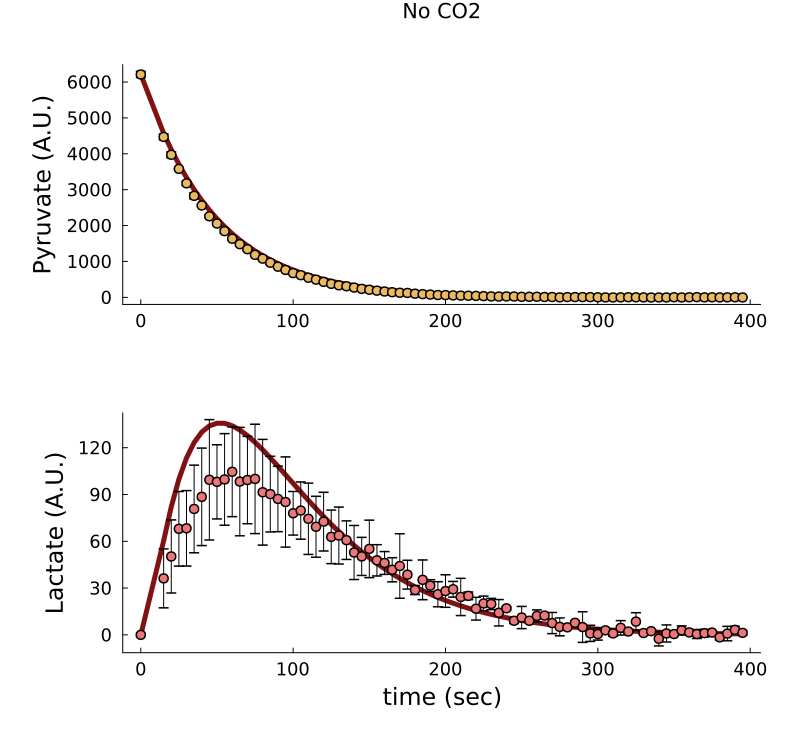

In [207]:
pp1 = plot(tsCN, SimOnTime1TN[:,1,1]+SimOnTime1TN[:,2,1], linewidth = 5, color = "#821114ff", label = "", title = "No CO2")
scatter!(tsCN, dat8NCO2[:,2], yerror = dat8NCO2[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsCN, SimOnTime1TN[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsCN, dat8NCO2[:,4], yerror = dat8NCO2[:,5], label = "", xlabel="time (sec)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P1 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)

Same Kin as previous fit

In [208]:
T1ss = vcat(datT1[1:5,2], datT1[7:11,2]);

In [209]:
Iters = 1;
CCsC3 = Array{Any}(undef,Iters);
FitsC3 = Array{Any}(undef,Iters);

In [240]:
for i in 1:Iters
        fitness_progress_history = Array{Tuple{Int, Float64},1}()
        callback = oc -> push!(fitness_progress_history, (num_func_evals(oc), best_fitness(oc)))

        resM = bboptimize(ObjectFunctMETRC; SearchRange = [(0, 1e-2), (0, 1e-2), (ppT[3], ppT[3]), (ppT[4], ppT[4]), (ppT[5], ppT[5])], 
                MaxTime = 60*0.2, method = :adaptive_de_rand_1_bin, 
                CallbackFunction = callback, CallbackInterval = 0.0)

        CCsC3[i] = fitness_progress_history;
        FitsC3[i] = resM;
end

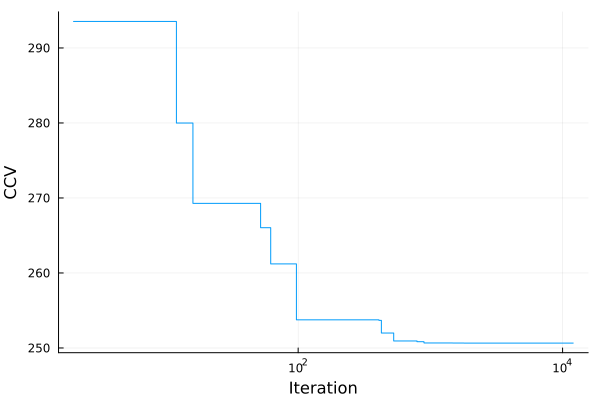

In [241]:
# Plot convergence curve
pl=plot(CCsC3[1], xaxis=:log, linetype=:step, label = "", xlabel = "Iteration", ylabel = "CCV")
for i in 2:length(CCsC3)
    plot!(CCsC3[i], xaxis=:log, linetype=:step, label = "")
end

display(pl)

In [242]:
parfitC3 = zeros(5, Iters);
for i in 1:Iters
    parfitC3[:,i] = best_candidate(FitsC3[i]);
end

In [243]:
ppC3 = mean(parfitC3, dims = 2)

5×1 Matrix{Float64}:
  0.0014097485922506608
  0.0006603520612512206
 41.73351464475684
 51.20933014343426
  0.0004895619448586228

In [215]:
JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMC3.jld2", "FitsC3",FitsC3)
JLD2.save("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC3.jld2", 
        "resMMat",parfitC3, "CCsC3", CCsC3)

In [216]:
ppC3 = mean(JLD2.load("C:\\IBECPostDocDrive\\2024_01_16_NCvsKR\\DataProcessingInference\\InitalParameterFitPriorDef\\FitResults\\resMVectC3.jld2")["resMMat"], dims = 2);


In [244]:
tsCN = dat8NCO2[:,1]
ts = 0:tsCN[end];
ivss = [dat8NCO2[1,2], 0, dat8NCO2[1,4]];
samps = convert.(Int, tsCN);
SimOnTime1TN, SimOffTime1TN, SimAll1TN  = PyruvateHP_NMR_SolveAllTb(ts, vcat(vcat(ppC3[1:2].*8, ppC3[3:end-1], ppC3[end].*8), 0), ivss, samps);

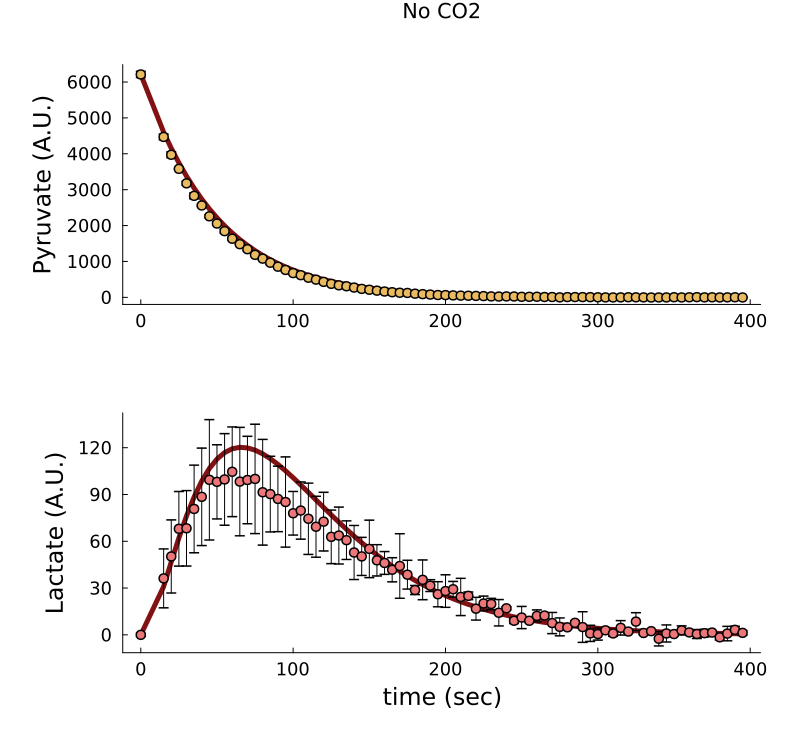

In [239]:
pp1 = plot(tsCN, SimOnTime1TN[:,1,1]+SimOnTime1TN[:,2,1], linewidth = 5, color = "#821114ff", label = "", title = "No CO2")
scatter!(tsCN, dat8NCO2[:,2], yerror = dat8NCO2[:,3], label = "", xlabel="", ylabel = "Pyruvate (A.U.)", grid = false, color="#eaba61ff", markersize=5)

pp2 = plot(tsCN, SimOnTime1TN[:,3,1], linewidth = 5, color = "#821114ff", label = "")
scatter!(tsCN, dat8NCO2[:,4], yerror = dat8NCO2[:,5], label = "", xlabel="time (sec)", ylabel = "Lactate (A.U.)", grid = false, color="#ed7679ff", markersize=5)

P1 = plot(pp1,pp2, layout=(2,1), size = (800,750), margin = 8mm, xguidefontsize=16, yguidefontsize=16, tickfontsize=12)